# Importar e instalar librerías para la manipulación y análisis del dataset

In [1]:
#Importamos librería para hacer análisis descriptivos del dataset
!pip3 install pandas==1.4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 10.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
#Importamos librería para hacer análisis descriptivos del dataset
!pip install pandas-profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 14.0 MB/s 
     |████████████████████████████████| 696 kB 48.9 MB/s 
     |████████████████████████████████| 12.8 MB 27.7 MB/s 
     |████████████████████████████████| 4.7 MB 53.2 MB/s 
     |████████████████████████████████| 9.9 MB 59.4 MB/s 
     |████████████████████████████████| 309 kB 65.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 102 kB 71.4 MB/s 
     |████████████████████████████████| 296 kB 67.8 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=dc905a5f652b70c30f33efced160eaa751aa4739f26cf81dd00e921722cd4c53
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling

In [3]:
#Importamos librerías que utilizaremos para procesar el dataset y analizarlo
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Análisis descriptivo del dataset

In [5]:
#Leemos el dataset. Se trata de un dataset basado en una encuesta de factores de riesgo cardiovascular. Contiene distintas variables que pueden tener un impacto 
#en la probabilidad de que una persona tenga una enfermedad cardíaca, además de la variable respuesta que indica si la persona tiene una enfermedad de este tipo o no 
df = pd.read_csv('heart_disease_health_indicators_dataset.csv', sep = ';')
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 22 columns]

In [6]:
#Columnas y tipos de datos
df.dtypes

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
#Contamos la cantidad de datos de cada campo
df.count()

HeartDiseaseorAttack    253680
HighBP                  253680
HighChol                253680
CholCheck               253680
BMI                     253680
Smoker                  253680
Stroke                  253680
Diabetes                253680
PhysActivity            253680
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
AnyHealthcare           253680
NoDocbcCost             253680
GenHlth                 253680
MentHlth                253680
PhysHlth                253680
DiffWalk                253680
Sex                     253680
Age                     253680
Education               253680
Income                  253680
dtype: int64

In [8]:
#Observación preliminar de los valores que arrojan los distintos campos
df.info

<bound method DataFrame.info of         HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
0                          0       1         1          1   40       1   
1                          0       0         0          0   25       1   
2                          0       1         1          1   28       0   
3                          0       1         0          1   27       0   
4                          0       1         1          1   24       0   
...                      ...     ...       ...        ...  ...     ...   
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0        

In [9]:
#Descripción total del dataset en forma transpuesta
df.describe().T

count       mean       std   min   25%   50%   75%  \
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
Diabetes              253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
HeartDiseaseorAttack   1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
Diabetes               2.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [10]:
# Resumen Estadistico por columna

for i in (range(len(df.columns))):
    print(df[df.columns[i]].describe())

count    253680.000000
mean          0.094186
std           0.292087
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HeartDiseaseorAttack, dtype: float64
count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64
count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64
count    253680.000000
mean          0.962670
std           0.189571
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          2

In [11]:
#Observamos los valores únicos que asume cada variable
for i in range(len(df.columns)):
  print(f"Columna:\t {df.columns[i]}", df.iloc[:, i].unique(), "\n")

Columna:	 HeartDiseaseorAttack [0 1] 

Columna:	 HighBP [1 0] 

Columna:	 HighChol [1 0] 

Columna:	 CholCheck [1 0] 

Columna:	 BMI [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78] 

Columna:	 Smoker [1 0] 

Columna:	 Stroke [0 1] 

Columna:	 Diabetes [0 2 1] 

Columna:	 PhysActivity [0 1] 

Columna:	 Fruits [0 1] 

Columna:	 Veggies [1 0] 

Columna:	 HvyAlcoholConsump [0 1] 

Columna:	 AnyHealthcare [1 0] 

Columna:	 NoDocbcCost [0 1] 

Columna:	 GenHlth [5 3 2 4 1] 

Columna:	 MentHlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23] 

Columna:	 PhysHlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11] 

Columna:	 DiffWalk [1 0] 

Columna:	 Sex [0 1] 

Columna:	 Age [ 9  7 11 10  8 13  

In [12]:
# Vamos a clasificar a las variables cuyo len es 2 como variables categóricas (binarias), el resto las consideraremos como numéricas a pesar de que en algunos casos se trate de variables
# que originalmente eran categóricas ordinales

for i in range(len(df.columns)):
    if len(df.iloc[:, i].unique()) <= 2:
        df.iloc[:, i] = df.iloc[:, i].astype('str')
    else:
        df.iloc[:, i] = df.iloc[:, i].astype('int64')


In [13]:
#Observamos cómo quedaron los tipos de datos después de la transformación 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   HeartDiseaseorAttack  253680 non-null  object
 1   HighBP                253680 non-null  object
 2   HighChol              253680 non-null  object
 3   CholCheck             253680 non-null  object
 4   BMI                   253680 non-null  int64 
 5   Smoker                253680 non-null  object
 6   Stroke                253680 non-null  object
 7   Diabetes              253680 non-null  int64 
 8   PhysActivity          253680 non-null  object
 9   Fruits                253680 non-null  object
 10  Veggies               253680 non-null  object
 11  HvyAlcoholConsump     253680 non-null  object
 12  AnyHealthcare         253680 non-null  object
 13  NoDocbcCost           253680 non-null  object
 14  GenHlth               253680 non-null  int64 
 15  MentHlth         

In [14]:
#Principales Estadísticos de las variables numéricas
df.describe().T

count       mean       std   min   25%   50%   75%   max
BMI        253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0  98.0
Diabetes   253680.0   0.296921  0.698160   0.0   0.0   0.0   0.0   2.0
GenHlth    253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   5.0
MentHlth   253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0  30.0
PhysHlth   253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0  30.0
Age        253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0  13.0
Education  253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   6.0
Income     253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   8.0

# Análisis univariado, bivariado y multivariado

In [15]:
# A continuación obtendremos un reporte de pandas donde se realiza un análisis descriptivo de las variables, se muestran las interacciones entre las variables numéricas y se muestran algunas coeficientes de correlación

profile = pandas_profiling.ProfileReport(df)
profile



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Seleccionamos algunas posibles variables explicativas que a priori pueden tener un impacto en HeartDiseaseorAttack como Smoker, High Blood Pressure, High Cholesterol, Age, Diabetes, etc. para contar con una aproximación de la incidencia que pueden tener sobre la variable de resultado. Podemos observar que para todas ellas parece haber mayor participación del grupo que asume 1 en la variable respuesta

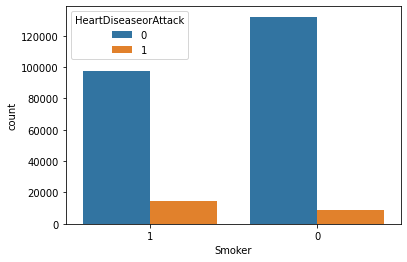

In [16]:
sns.countplot(x='Smoker',hue='HeartDiseaseorAttack',data=df)

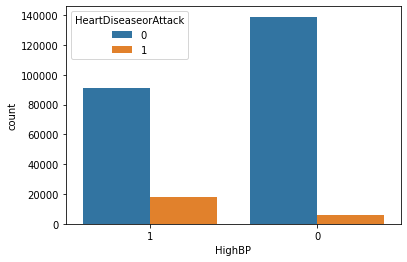

In [17]:
sns.countplot(x='HighBP',hue='HeartDiseaseorAttack',data=df)

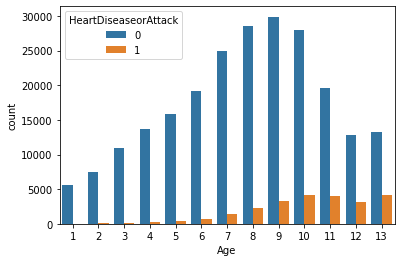

In [18]:
sns.countplot(x='Age',hue='HeartDiseaseorAttack',data=df)

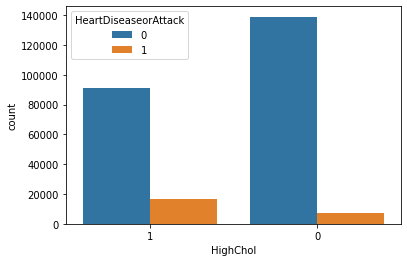

In [19]:
sns.countplot(x='HighChol',hue='HeartDiseaseorAttack',data=df)

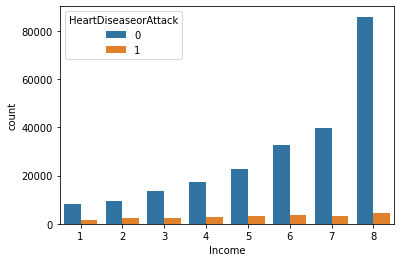

In [20]:
sns.countplot(x='Income',hue='HeartDiseaseorAttack',data=df)

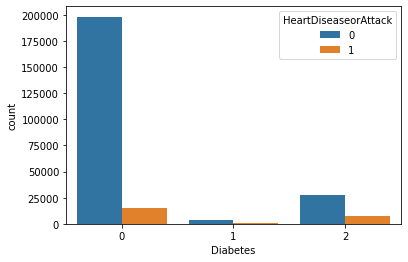

In [21]:
sns.countplot(x='Diabetes',hue='HeartDiseaseorAttack',data=df)

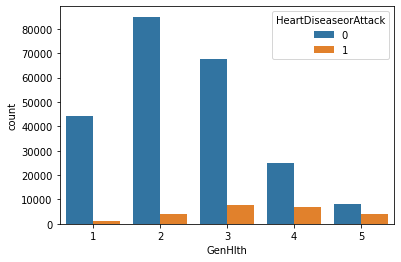

In [22]:
sns.countplot(x='GenHlth',hue='HeartDiseaseorAttack',data=df)

# Análisis de correlaciones




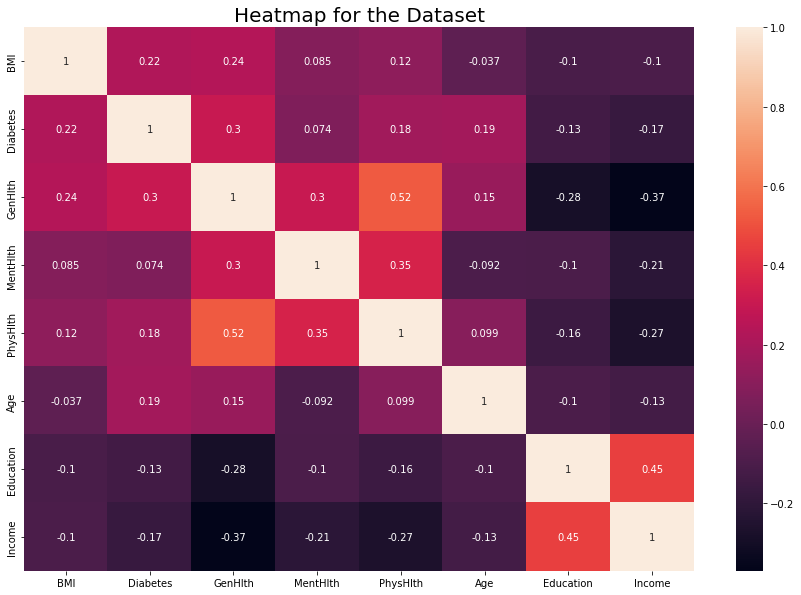

In [29]:
#Hacemos un Heatmap de las variables numéricas para ver su correlación 
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

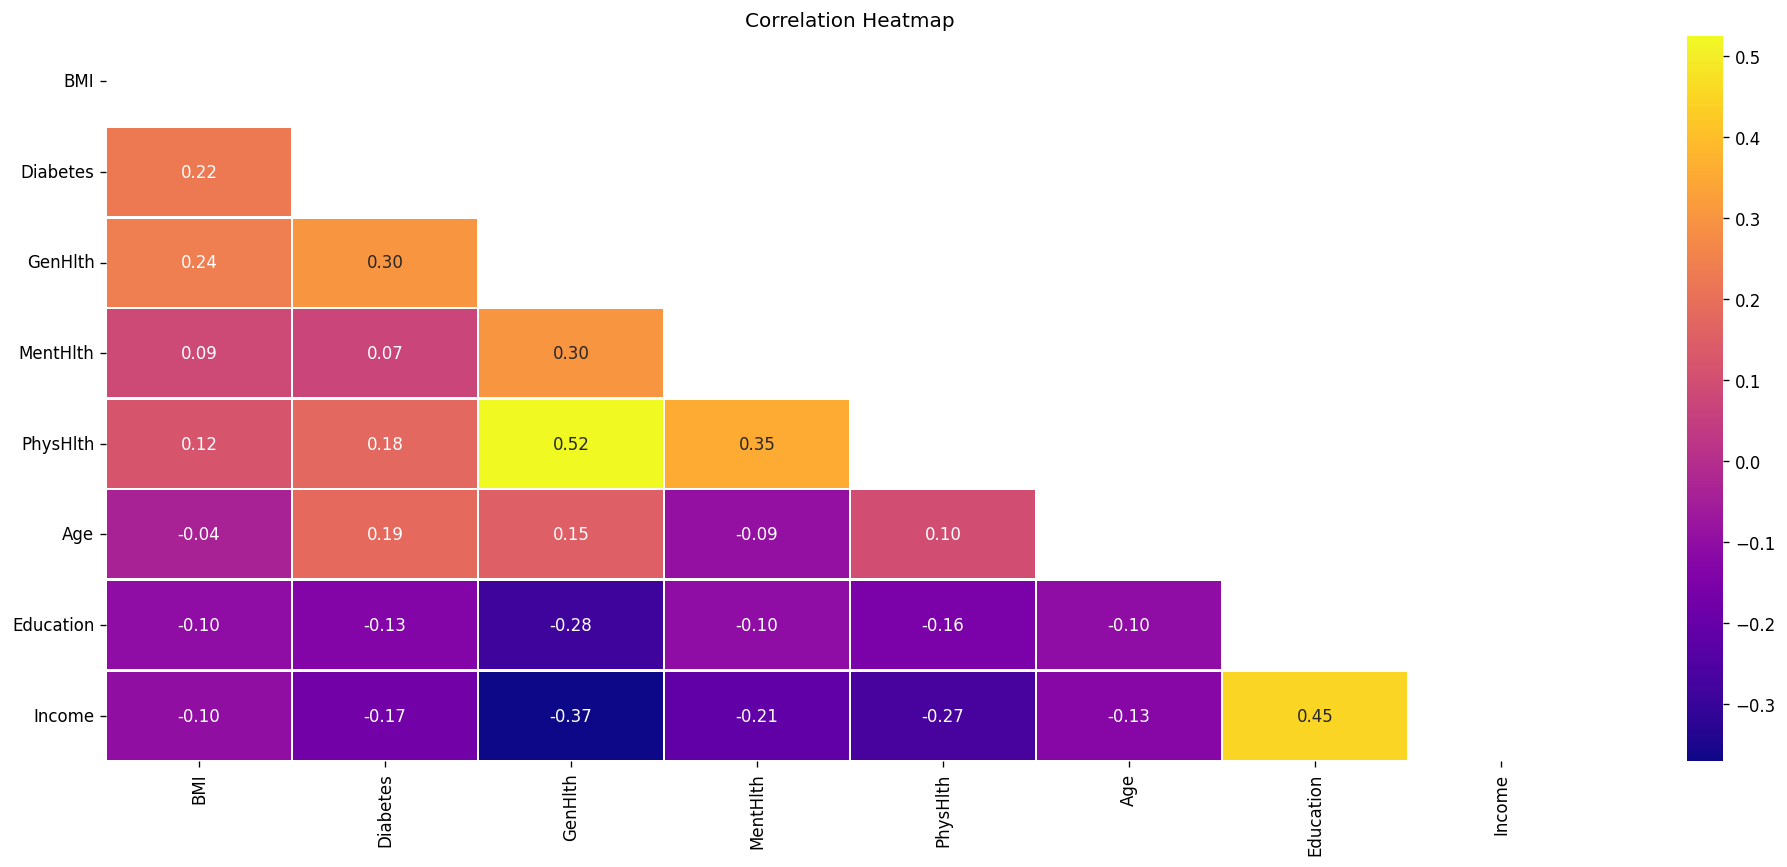

In [30]:
#Mismo heatmap anterior pero presentado de otra manera
plt.figure(dpi = 120,figsize= (20,8))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

A partir de los heatmaps volcados arriba, observamos que existe alta correlación entre las variables **GenHealth** y **PhysHealth**, así como alta correlación entre **Age** e **Income**. 
Para evaluar si es necesario eliminar alguna de estas variables del dataset, vamos a analizar cómo se comportan con respecto a la variable respuesta.

##Correlación entre GenHealth y PhysHealth en relación a la variable respuesta

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


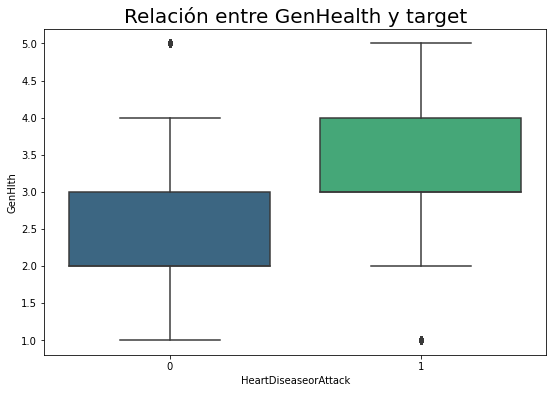

In [35]:
#Boxplot de GentHealth con respecto al target
plt.rcParams['figure.figsize'] = (9, 6)
sns.boxplot(df['HeartDiseaseorAttack'], df['GenHlth'], palette = 'viridis')
plt.title('Relación entre GenHealth y target', fontsize = 20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


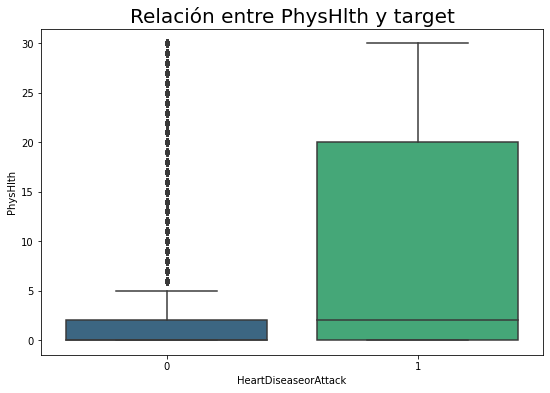

In [36]:
#Boxplot de PhysHealth con respecto al target
plt.rcParams['figure.figsize'] = (9, 6)
sns.boxplot(df['HeartDiseaseorAttack'], df['PhysHlth'], palette = 'viridis')
plt.title('Relación entre PhysHlth y target', fontsize = 20)
plt.show()

Se observa que tanto GenHealth como PhysHealth tienen comportamientos distintos con respecto a los valores que asume la variable respuesta. GenHealth concentra su distribución entre los valores medios: 2 y 3 cuando el target es 0, y entre 3 y 4 cuando el target es 1. En cambio, PhysHlth concentra su distribución en valores cercanos a 0 cuando el target es 0, y presenta una gran variabibilidad cuando el target asume valor 1 (entre 0 y 20). De esta manera podemos concluir que, aunque las variables están correlacionadas entre sí, denotan un comportamiento distinto con respecto a la variable respuesta, lo que genera que ambas puedas aportar información como drivers de un modelo.

##Correlación entre Age y Income en relación a la variable respuesta

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


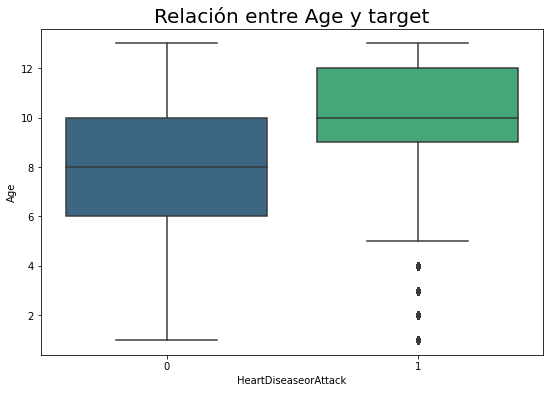

In [37]:
#Boxplot de Age con respecto al target
plt.rcParams['figure.figsize'] = (9, 6)
sns.boxplot(df['HeartDiseaseorAttack'], df['Age'], palette = 'viridis')
plt.title('Relación entre Age y target', fontsize = 20)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


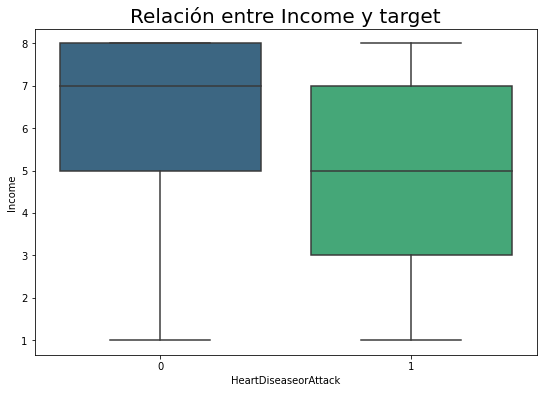

In [38]:
#Boxplot de Income con respecto al target
plt.rcParams['figure.figsize'] = (9, 6)
sns.boxplot(df['HeartDiseaseorAttack'], df['Income'], palette = 'viridis')
plt.title('Relación entre Income y target', fontsize = 20)
plt.show()

Se observa que la variable Age está concentrada en valores altos cuando la variable de resultado es 1 mientras que, cuando la variable respuesta asume valor 0, la distribución está concentrada en valores intermedios de Age. 
En cambio, en Income, cuando la variable respuesta es 0, la distribución está concentrada en los valores más altos de la variable (mayores ingresos); mientras que, cuando la variable es 1, la distribución presenta mayor variabilidad, asumiendo valores de ingresos más bajos. Dado que ambas variables denotan relaciones distintas con la variable respuesta a pesar de estar correlacionadas entre sí, se incluirán ambas en el dataset.

# Balancear el dataset

 Analizamos la variable de resultado "HeartDiseaseorAttack"

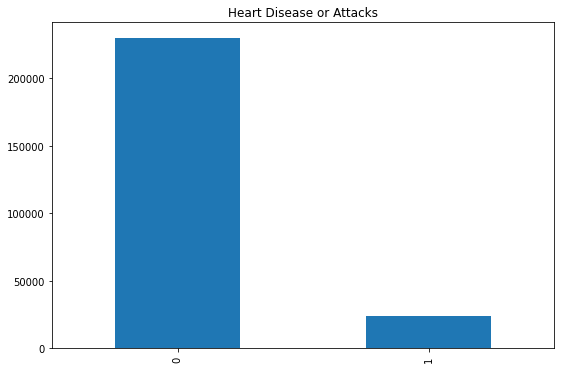

In [39]:
# Gráfico de barras de Heart Diseases or Attacks
plot = df['HeartDiseaseorAttack'].value_counts().plot(kind='bar',
                                            title='Heart Disease or Attacks')

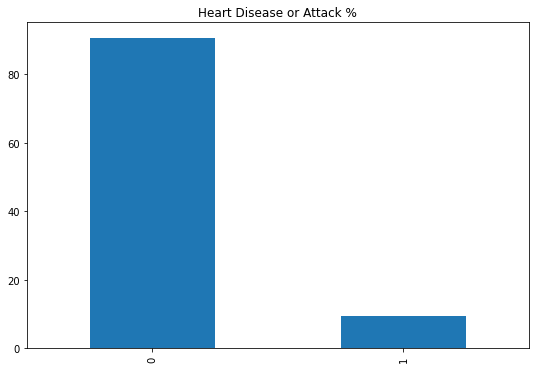

In [40]:
# gráfico de barras de frecuencias relativas de Heart Diseases or Attacks
plot = (100 * df['HeartDiseaseorAttack'].value_counts() / len(df['HeartDiseaseorAttack'])).plot(
kind='bar', title='Heart Disease or Attack %')

Observamos que el dataset está muy desbalanceado, por lo que vamos a aplicar un método para contar con un dataset en el que la cantidad observaciones de cada clase equipare

Vamos a aplicar la técnica de "Submuestreo de la clase mayoritaria", en la que se toma una muestra aleaatoria de la clase mayoritaria igual a la cantidad de observaciones que presenta la clase minoritaria, de modo que ambas cuenten con la misma cantidad de observaciones

In [41]:
y = df['HeartDiseaseorAttack']
X = df.drop('HeartDiseaseorAttack', axis=1)

In [42]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_resample(X, y)

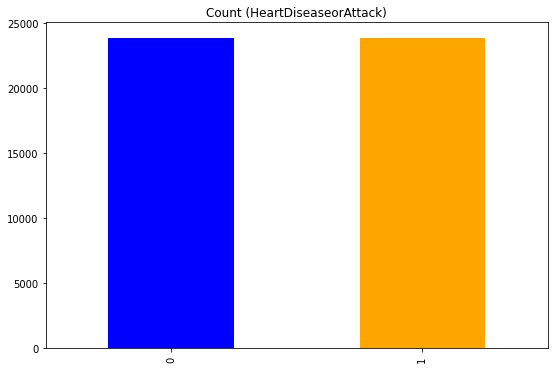

In [43]:
df_rus = pd.DataFrame(X_rus)
df_rus['HeartDiseaseorAttack'] = y_rus
df_rus.HeartDiseaseorAttack.value_counts().plot(kind='bar', title='Count (HeartDiseaseorAttack)', color = ['b', 'orange'])

In [44]:
#Nuevo dataset balanceado: el número de observaciones se redujo a 47.786. 
df_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47786 entries, 0 to 47785
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   HighBP                47786 non-null  object
 1   HighChol              47786 non-null  object
 2   CholCheck             47786 non-null  object
 3   BMI                   47786 non-null  int64 
 4   Smoker                47786 non-null  object
 5   Stroke                47786 non-null  object
 6   Diabetes              47786 non-null  int64 
 7   PhysActivity          47786 non-null  object
 8   Fruits                47786 non-null  object
 9   Veggies               47786 non-null  object
 10  HvyAlcoholConsump     47786 non-null  object
 11  AnyHealthcare         47786 non-null  object
 12  NoDocbcCost           47786 non-null  object
 13  GenHlth               47786 non-null  int64 
 14  MentHlth              47786 non-null  int64 
 15  PhysHlth              47786 non-null

El nuevo dataset que surge de aplicar esta solución al problema de desbalanceo cuenta con 47.786 registros.

Volvemos a generar los gráficos que volcamos en la sección de Análisis Univariado, Bivariado y Multivariado para observar si la incidencia de las variables explicativas, ahora que el dataset está balanceado, parece ser mayor o no

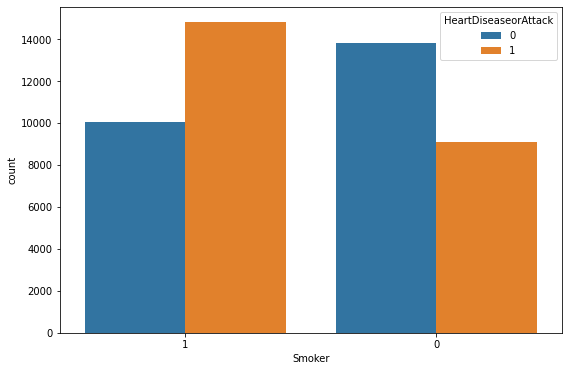

In [45]:
sns.countplot(x='Smoker',hue='HeartDiseaseorAttack',data=df_rus)

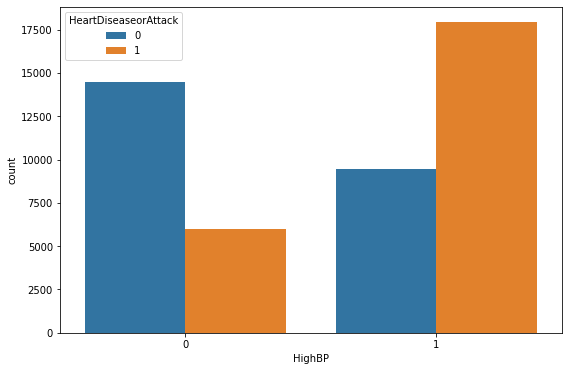

In [46]:
sns.countplot(x='HighBP',hue='HeartDiseaseorAttack',data=df_rus)

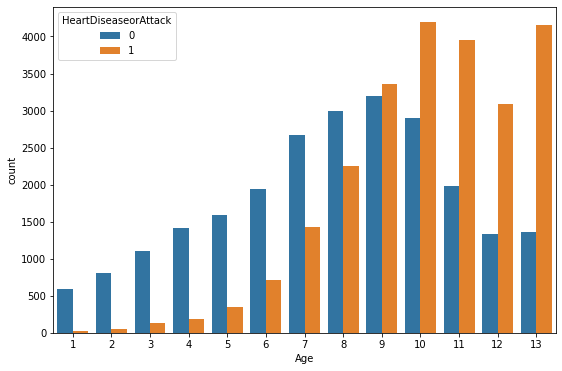

In [47]:
sns.countplot(x='Age',hue='HeartDiseaseorAttack',data=df_rus)

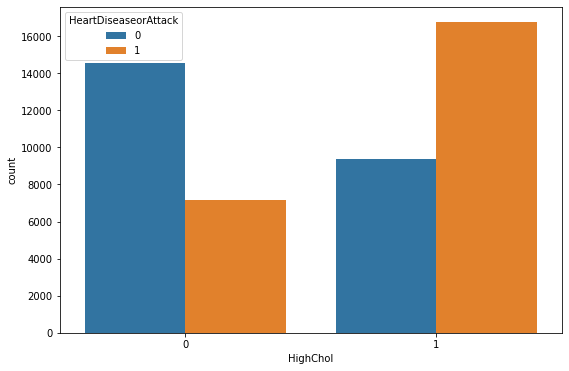

In [48]:
sns.countplot(x='HighChol',hue='HeartDiseaseorAttack',data=df_rus)

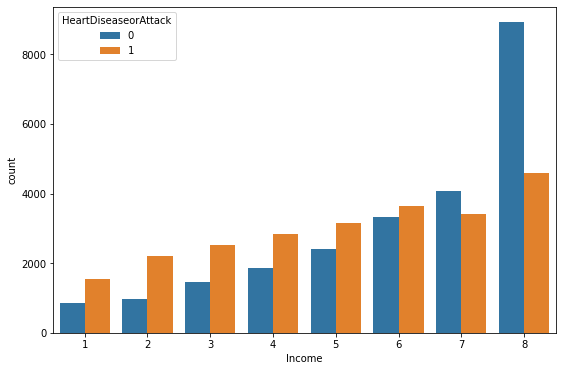

In [49]:
sns.countplot(x='Income',hue='HeartDiseaseorAttack',data=df_rus)

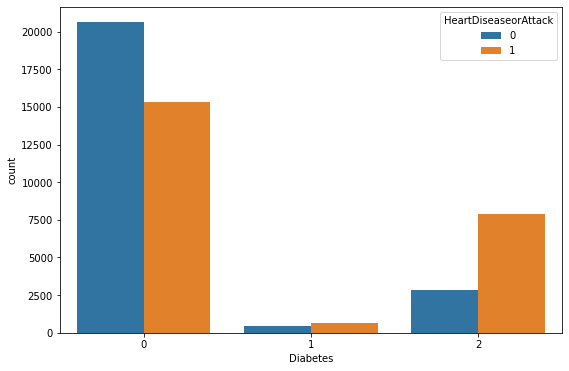

In [50]:
sns.countplot(x='Diabetes',hue='HeartDiseaseorAttack',data=df_rus)

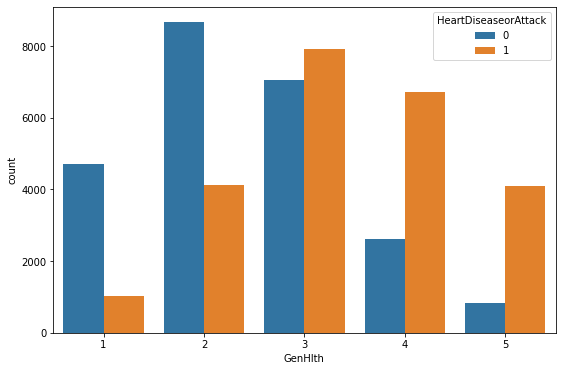

In [51]:
sns.countplot(x='GenHlth',hue='HeartDiseaseorAttack',data=df_rus)

Podemos observar que para todas estas variables, algunos grupos que asumen ciertos valores (como valores altos de Age, presión alta o ser fumador) parece aumentar notablemente la prevalencia de un problema cardíaco. 

# Algoritmos de clasificación



A continuación, vamos a correr distintos algoritmos de clasificación, esto es, algoritmos de aprendizaje supervisado que van a intentar identificar cuáles son los drivers más importantes a la hora de predecir el valor que asume la variable respuesta

In [52]:
#Cargamos librerías que resultan útiles para 
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [53]:
#Utilizamos ahora el nuevo dataset balanceado "df_rus"
y = df_rus['HeartDiseaseorAttack']
X = df_rus.drop(['HeartDiseaseorAttack'], axis=1)

In [54]:
#Obtenemos una muestra para el train y para el test

from sklearn.model_selection import train_test_split 
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

## **Árbol de decisión**




Vamos a correr el algoritmo de Tree Classifier

In [55]:
# Importamos el algoritmo de Árbol de Decision
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=10, random_state = 42) 

In [56]:
#Entrenamos el modelo
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=10, random_state=42)

In [57]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

In [58]:
y_test_pred

array(['1', '0', '0', ..., '0', '1', '1'], dtype=object)

In [59]:
y_test

43203    1
12623    0
7911     0
12845    0
37703    1
        ..
37353    1
13906    0
586      0
28613    1
36280    1
Name: HeartDiseaseorAttack, Length: 14336, dtype: object

Indicadores de desempeño del Arbol de decisión

In [60]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7474888392857143

In [61]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 

array([[5297, 1840],
       [1780, 5419]])

In [62]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred, pos_label='1')

0.7465215594434496

In [63]:
#Sensibiilidad
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred,pos_label='1') 

0.752743436588415

In [64]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred,pos_label='1')

0.749619587771476

In [65]:
#Resumen de todos los indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      7137
           1       0.75      0.75      0.75      7199

    accuracy                           0.75     14336
   macro avg       0.75      0.75      0.75     14336
weighted avg       0.75      0.75      0.75     14336



In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([1.        , 0.19620253, 0.04561404, ..., 0.4479638 , 0.65217391,
       0.8125    ])

In [67]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1,pos_label = '1')

In [68]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.8103185325955337


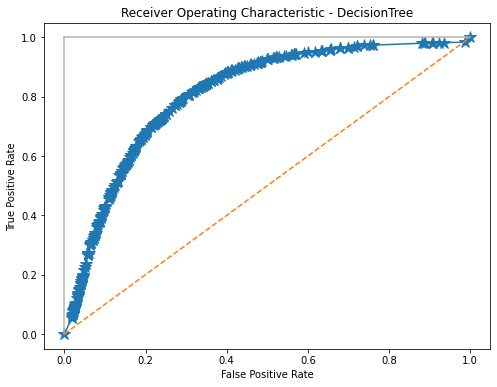

In [69]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=12)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Random Forest**

In [70]:
#Corremos el algoritmo de Random Forest

model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [71]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [72]:
model.feature_importances_

array([0.06458105, 0.04332874, 0.00462116, 0.13704777, 0.02562671,
       0.02484302, 0.0328046 , 0.02225987, 0.02617977, 0.02096051,
       0.00873133, 0.00687962, 0.01114002, 0.09517973, 0.04883862,
       0.07131239, 0.03558395, 0.03002822, 0.15443341, 0.05435466,
       0.08126486])

<BarContainer object of 21 artists>

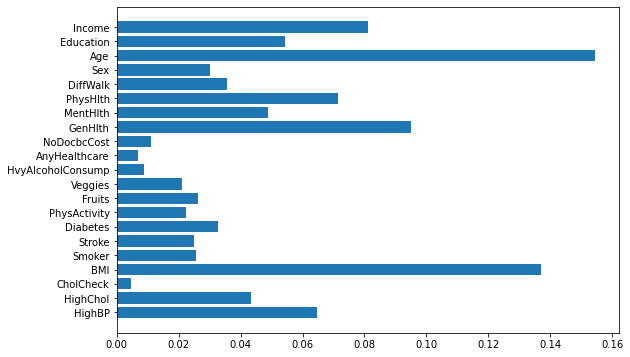

In [73]:
plt.barh(X_train.columns, model.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

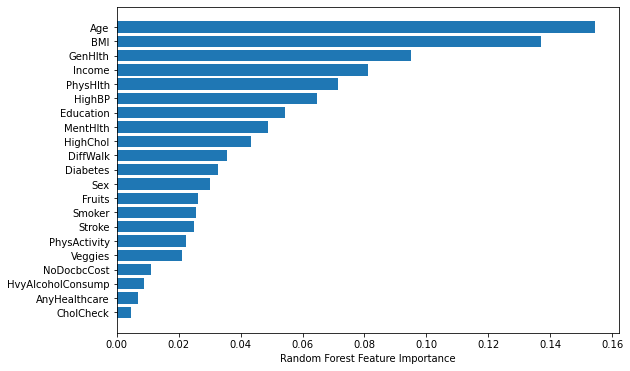

In [74]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [75]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7603236607142857

In [76]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 

array([[5140, 1997],
       [1439, 5760]])

In [77]:
#Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred, pos_label='1')

0.7425551115121826

In [78]:
#Sensibiilidad
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred,pos_label='1') 

0.8001111265453535

In [79]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred,pos_label='1')

0.7702594276544532

In [80]:
#Resumen de todos los indicadores
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      7137
           1       0.74      0.80      0.77      7199

    accuracy                           0.76     14336
   macro avg       0.76      0.76      0.76     14336
weighted avg       0.76      0.76      0.76     14336



In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = model.predict_proba(X_test)[:,1]
y_score1

array([0.54      , 0.175     , 0.16      , ..., 0.61750463, 0.62      ,
       0.8       ])

In [82]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1,pos_label = '1')

In [83]:
print('roc_auc_score for RandomForest: ', roc_auc_score(y_test, y_score1))

roc_auc_score for RandomForest:  0.8284458264806174


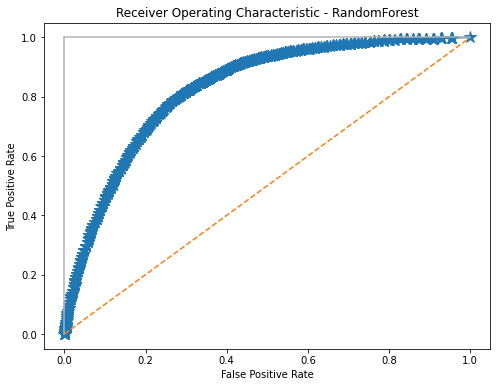

In [84]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1,marker='*', markersize=12)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **K Nearest Neighbors**

In [85]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [86]:
y_test=neigh.predict(X_test)

In [87]:
#Resumen de todos los indicadores de desempeño del K Nerarest Neighbors
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6401
           1       0.88      0.86      0.87      7935

    accuracy                           0.86     14336
   macro avg       0.86      0.86      0.86     14336
weighted avg       0.86      0.86      0.86     14336



## **Regresión** **Logística**

In [88]:
y_train

1954     0
4667     0
17515    0
1026     0
2578     0
        ..
11284    0
44732    1
38158    1
860      0
15795    0
Name: HeartDiseaseorAttack, Length: 33450, dtype: object

In [89]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [90]:
logisticmodel = LogisticRegression(random_state=42,max_iter=500,\
                         solver='newton-cg').fit(X_train, y_train)

In [91]:
y_test=logisticmodel.predict(X_test)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6859
           1       0.90      0.93      0.92      7477

    accuracy                           0.91     14336
   macro avg       0.91      0.91      0.91     14336
weighted avg       0.91      0.91      0.91     14336

